In [2]:
import numpy as np
import pandas as pd

In [93]:
df = pd.read_csv('C:\\Users\SHOAIB\Documents\kc_house_data.csv')
df.head()
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [42]:
df.drop('id',axis=1,inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [48]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [49]:
import seaborn as sns

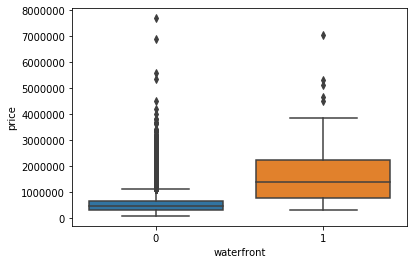

In [50]:
X = df['waterfront']
Y = df['price']
sns.boxplot(X,Y)

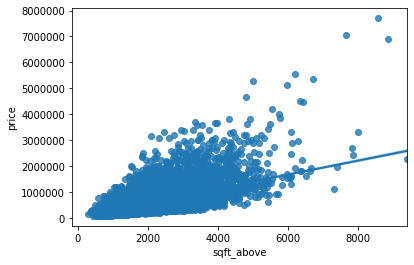

In [51]:
X1 = df['sqft_above']
Y1 = df['price']
sns.regplot(X1,Y1)

In [52]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()
X2 = df[['sqft_living']]
Y2 = df[['price']]
Hs = lr.fit(X2,Y2)
Hs.score(X2,Y2)

0.49285321790379316

In [58]:
Z = df[['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']]
Y = df[['price']]
hsa = lr.fit(Z,Y)
hsa.score(Z,Y)

0.6577149460370746

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
ypipe[0:4]

array([[283413.0766304 ],
       [662377.8434901 ],
       [305956.87442554],
       [408313.00471754]])

In [66]:
pipe.score(Z,Y)

0.6577151058279325

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
X_train , X_test ,Y_train , Y_test = train_test_split(Z,Y,test_size = 0.25,random_state=1)
Rige = Ridge(alpha=0.1).fit(X_train,Y_train)
Yhat = Rige.predict(X_test)
print('predicted:', Yhat[0:4])
print('test set :', Y_test[0:4].values)
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(X_train, Y_train)
    Rsqu_test.append(RigeModel.score(X_test, Y_test))
    Rsqu_train.append(RigeModel.score(X_train, Y_train))

predicted: [[650503.1744382 ]
 [513115.7715148 ]
 [804762.36566514]
 [705362.29871067]]
test set : [[ 459000.]
 [ 445000.]
 [1057000.]
 [ 732350.]]


C:\Users\SHOAIB\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86637e-17): result may not be accurate.
  overwrite_a=True).T


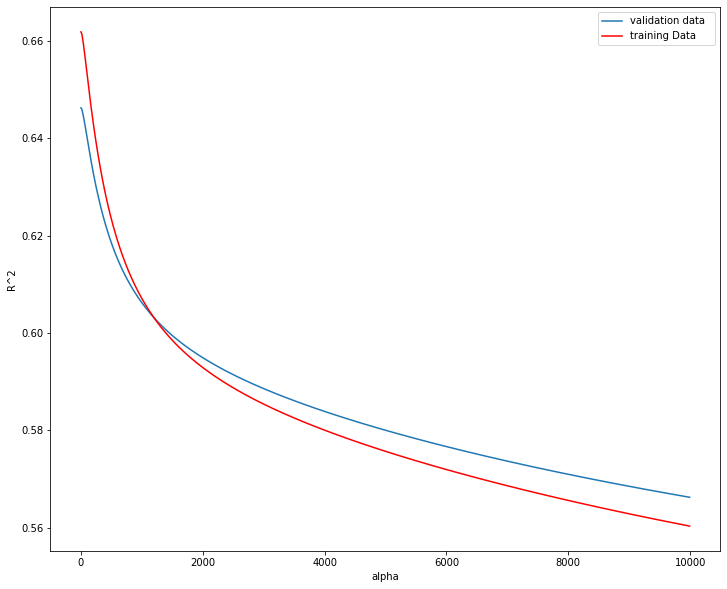

In [87]:
import matplotlib.pyplot as plt
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [94]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
poly = PolynomialFeatures(degree=2)

In [97]:
x_train_pr = poly.fit_transform(X_train)
x_test_pr = poly.fit_transform(X_test)
Rige = Ridge(alpha=0.1).fit(x_train_pr,Y_train)
Yhat = Rige.predict(x_test_pr)
print('predicted:', Yhat[0:4])
print('test set :', Y_test[0:4].values)


predicted: [[569777.9966212 ]
 [492772.06215703]
 [620056.97102169]
 [680136.34428531]]
test set : [[ 459000.]
 [ 445000.]
 [1057000.]
 [ 732350.]]


C:\Users\SHOAIB\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.21884e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHOAIB\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.92173e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHOAIB\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.69491e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHOAIB\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39162e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHOAIB\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37642e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\SHOAIB\Anaconda3\lib\site-packages\sklearn\linear_m

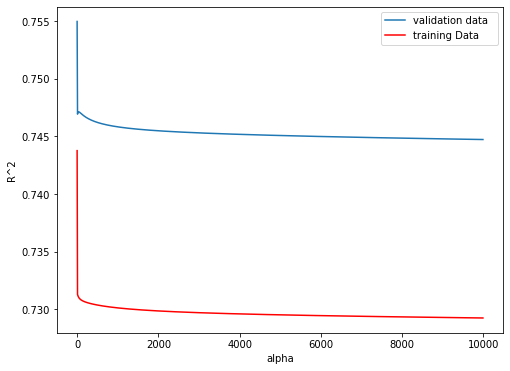

In [99]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, Y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, Y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, Y_train))
    
import matplotlib.pyplot as plt
width = 8
height = 6
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()